<a href="https://colab.research.google.com/github/ArulGilbert/PyTorch-Card-Detection/blob/main/Cards_detection_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch Model!



*   Pytorch Dataset
*   Pytorch Model
*   Pytorch Training Loop



### Import Libraries

In [2]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arulgilbert","key":"632f826c768c8ad3cf05927f4d6b8785"}'}

In [5]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 95% 365M/385M [00:03<00:00, 114MB/s]
100% 385M/385M [00:03<00:00, 105MB/s]


In [6]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [7]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/jack of spades/059.jpg  
  inflating: train/jack of spades/060.jpg  
  inflating: train/jack of spades/061.jpg  
  inflating: train/jack of spades/062.jpg  
  inflating: train/jack of spades/063.jpg  
  inflating: train/jack of spades/064.jpg  
  inflating: train/jack of spades/065.jpg  
  inflating: train/jack of spades/066.jpg  
  inflating: train/jack of spades/067.jpg  
  inflating: train/jack of spades/068.jpg  
  inflating: train/jack of spades/069.jpg  
  inflating: train/jack of spades/070.jpg  
  inflating: train/jack of spades/071.jpg  
  inflating: train/jack of spades/072.jpg  
  inflating: train/jack of spades/073.jpg  
  inflating: train/jack of spades/074.jpg  
  inflating: train/jack of spades/075.jpg  
  inflating: train/jack of spades/076.jpg  
  inflating: train/jack of spades/077.jpg  
  inflating: train/jack of spades/078.jpg  
  inflating: train/jack of spades/079.jpg  
  inflating: train/jack o

## Pytorch Dataset(and Dataloader)
- Organized way to structure the data and labels into the model
- We can then wrap the dataset in a dataloader and pytorch will handle batching the shuffling the data for us when training the model!

In [8]:
class PlayingCardDataset(Dataset):
  def __init__(self, data_dir, transform=None):
    self.data = ImageFolder(data_dir, transform=transform)
  ## normally in torch datasets will need two additional methods one for length and getitem
  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

  @property
  def classes(self):
    return self.data.classes



In [9]:
dataset = PlayingCardDataset(data_dir='train')

In [10]:
len(dataset)

7624

In [11]:
dataset[1]

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

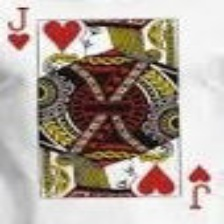

In [12]:
image, label = dataset[2727]
image

In [13]:
print(label)

18


In [14]:
# Get a dictionary associating target values with folder names
data_dir = 'train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [15]:
# we should make sure the outputs are all in the same size

transform = transforms.Compose(
    [transforms.Resize((128,128)),
     transforms.ToTensor(),]
)

data_dir='train'
dataset = PlayingCardDataset(data_dir, transform)


In [16]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

### Dataloaders
- Batching our dataset

In [17]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [18]:
for images, labels in dataloader:
  break

In [19]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [20]:
#labels are shuffled in random order
labels

tensor([12, 28, 32, 37, 10, 41, 44, 50, 11,  4, 36, 44,  8,  1, 35,  6, 37, 40,
        21, 17,  5, 19, 14, 45,  3,  3, 38, 14, 39, 44, 35, 34])

## Step 1. Pytorch Model
Pytorch Dataset have a structured way of organizing your data, pytorch models follow a similar paradigm

- We could create the model from sctrach defining each layer.
- However for tasks like image classfication, many of the state of the art architextures are readily available and we can import them from packages like timm.
- Understanding the pytorch model is all about understanding the shape the data is at each layer, and the main one we need to modify for a task is the final layer. Here we have 53 targets, so we will modify the last layer for this.

In [21]:
class SimpleCardClassifier(nn.Module):
  def __init__(self, num_classes=53):
    super(SimpleCardClassifier, self).__init__()
    # Where we define all the parts of the model
    self.base_model = timm.create_model('efficientnet_b0', pretrained = True)
    self.features = nn.Sequential(*list(self.base_model.children())[:-1])

    enet_out_size = 1280
    # Make a classifier
    self.classifier = nn.Linear(enet_out_size, num_classes)

  def forward(self, x):
    # Connect these parts and return the output
    x = self.features(x)
    output = self.classifier(x)
    return output


In [22]:
model = SimpleCardClassifier(num_classes = 53)
print(str(model)[:500])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [23]:
example_out = model(images)
example_out.shape # [batch_size, num_classes]

torch.Size([32, 53])

## Step 3. The training loop

- Now that we understand the general paradigm of pytorch datasets and models, we need to create the process of training this model.
- Some things to consider: We want to validate our model on data it has not been trained on, so usually we split our data into a train and validate datasets. This is easy because we can just create two datasets using our existing class.
- This loop is one you will become familiar with when training models, you load in data to the model in batches - then calculate the loss and perform backpropagation. There are packages that package this for you, but it's good to have at least written it once to understand how it works.
- Two things to select:
  - optimizer, adam is the best place to start for most tasks
  - loss function: What the model will optimize for

In [24]:
# Loss Function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
criterion(example_out, labels)

tensor(3.9712, grad_fn=<NllLossBackward0>)

## Setup Datasets

In [26]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = 'train'
valid_folder = 'valid'
test_folder = 'test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size = 32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

In [30]:
num_epochs = 5
train_loss, val_losses = [], []
model = SimpleCardClassifier(num_classes=53)

for epoch in range(num_epochs):
  # Set the model to train
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * labels.size(0)
  train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(train_loss)

  #validation Phase
  model.eval()
  running_loss = 0.0
  with torch.no_grad():
    for images, labels in val_loader:
      outputs = model(images)
      loss = criterion(outputs, labels)
      running_loss += loss.item() * labels.size(0)

  val_loss = running_loss / len(val_loader.dataset)
  val_losses.append(val_loss)

  # Print epoch stats
  print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")



KeyboardInterrupt: 